## **Project Objective:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## 1. Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [2]:
# Defining the path for train and test images
train_path="D://Documents//UpgradeAIML//CNN_assignment//Train"
test_path="D://Documents//UpgradeAIML//CNN_assignment//Test"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## 2. Data Preparation 

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

### Train Data Set Creation

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Validation Data Set Creation 

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## 3. Visualizing the data 

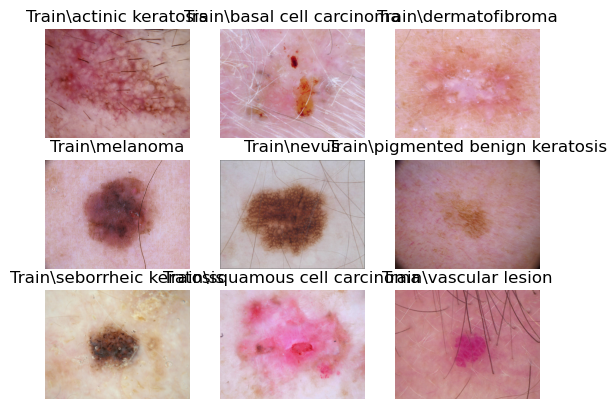

In [10]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model 0 

### Creating the model 

In [12]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])


### Compiling the model

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###  Training the model 

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 69s 1s/step - loss: 2.8262 - accuracy: 0.2048 - val_loss: 2.0673 - val_accuracy: 0.2260
Epoch 2/20
56/56 [==============================] - 59s 1s/step - loss: 1.9487 - accuracy: 0.2031 - val_loss: 1.9346 - val_accuracy: 0.3087
Epoch 3/20
56/56 [==============================] - 59s 1s/step - loss: 1.7970 - accuracy: 0.3225 - val_loss: 1.6922 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 57s 1s/step - loss: 1.6756 - accuracy: 0.4018 - val_loss: 1.7834 - val_accuracy: 0.3535
Epoch 5/20
56/56 [==============================] - 60s 1s/step - loss: 1.5672 - accuracy: 0.4542 - val_loss: 1.5602 - val_accuracy: 0.4899
Epoch 6/20
56/56 [==============================] - 58s 1s/step - loss: 1.5832 - accuracy: 0.4520 - val_loss: 1.4623 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 59s 1s/step - loss: 1.4886 - accuracy: 0.4927 - val_loss: 1.5148 - val_accuracy: 0.5101
Epoch 8/20
56/56 [==

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

###  Visualizing training results 

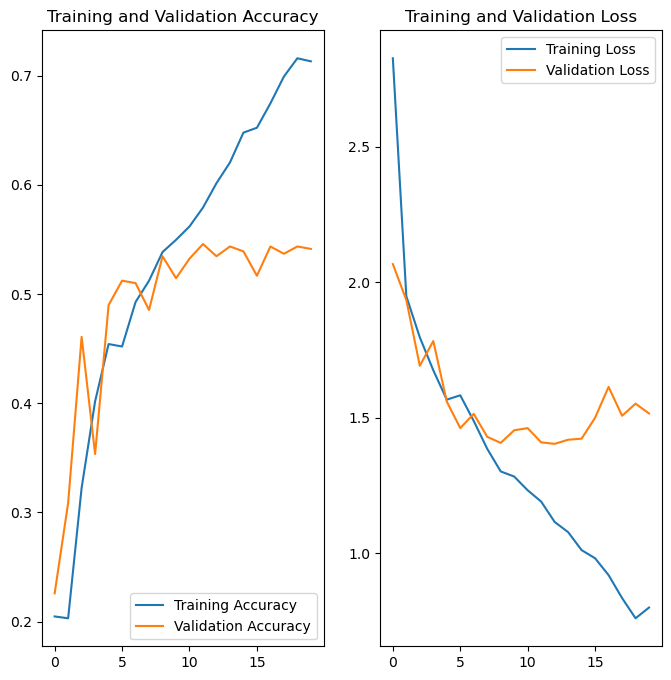

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###   Observations 

-  The accuracy of the model for the **Training data set** is at **71%**. But the **Validation accuracy** is not in par with the training accuracy. 
-  The validation loss as observed is very high.
-  This could also be indicative of some **Overfit** in the model.
-  We could add some `Dropout` layers and remove the `BatchNormalization` layers. 
-  And by adding a few more layers, we could improve the accuracy by trying to extract more features.

##  5. Model 1 

### Creating the Model 

In [17]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### Compiling the model

In [18]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model 

In [19]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 160s 3s/step - loss: 2.1611 - accuracy: 0.1853 - val_loss: 2.0607 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 155s 3s/step - loss: 2.0392 - accuracy: 0.1975 - val_loss: 2.0208 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 158s 3s/step - loss: 2.0283 - accuracy: 0.2126 - val_loss: 2.0258 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 165s 3s/step - loss: 2.0079 - accuracy: 0.2037 - val_loss: 1.9558 - val_accuracy: 0.2237
Epoch 5/20
56/56 [==============================] - 160s 3s/step - loss: 1.9335 - accuracy: 0.2595 - val_loss: 1.8399 - val_accuracy: 0.3266
Epoch 6/20
56/56 [==============================] - 159s 3s/step - loss: 1.8279 - accuracy: 0.3052 - val_loss: 1.8280 - val_accuracy: 0.3110
Epoch 7/20
56/56 [==============================] - 154s 3s/step - loss: 1.7540 - accuracy: 0.3454 - val_loss: 1.6547 - val_accuracy: 0.4228
Epoch 8/20
56

###  Visualizing the results

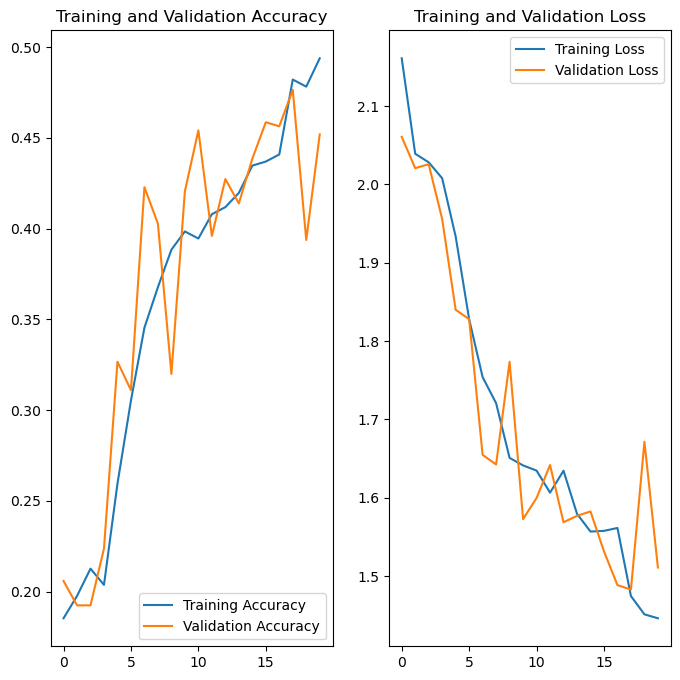

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations 

-  The model accuracy for **Train data set** has dropped to nearly **49%**.
-  The accuracy for the **Validation set** is at **45%**.
-  This is a much better model compared to the previous model as there seems to be **No Overfit** with the training accuracy **49%** and validation accuracy at **45%**.

## Data Augmentation

### Specifying the Augmentation

In [21]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

###  Visualizing the Augmented Data

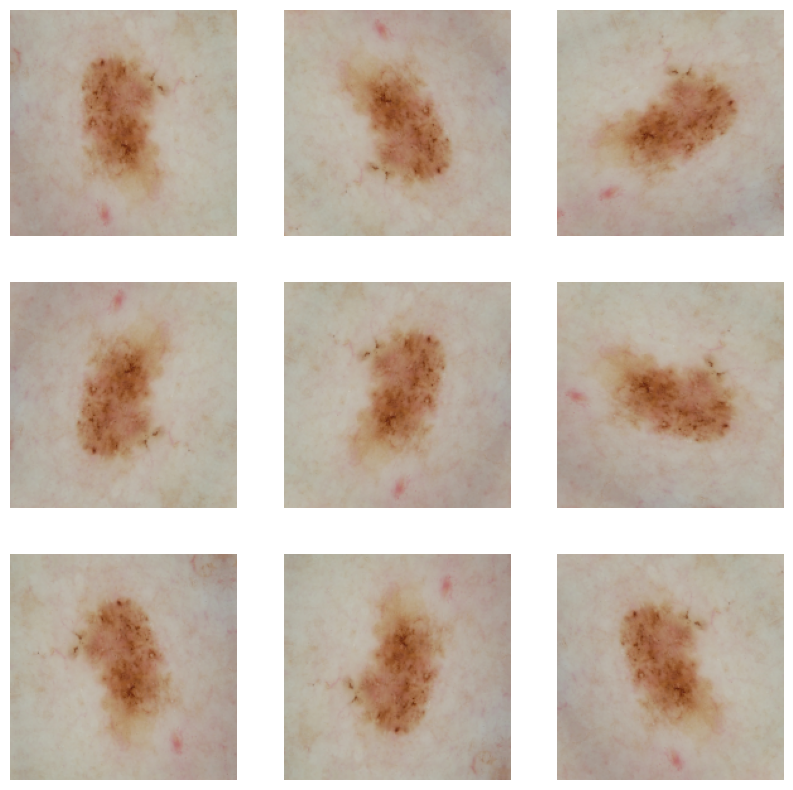

In [22]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

## 7. Model 2 

###  Creating the Model 

In [23]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### Compiling the model 

In [24]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model 

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 160s 3s/step - loss: 2.1401 - accuracy: 0.1992 - val_loss: 2.0707 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 158s 3s/step - loss: 2.0529 - accuracy: 0.2054 - val_loss: 2.0246 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 162s 3s/step - loss: 2.0425 - accuracy: 0.2081 - val_loss: 2.0315 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 162s 3s/step - loss: 2.0245 - accuracy: 0.2098 - val_loss: 2.0090 - val_accuracy: 0.2819
Epoch 5/20
56/56 [==============================] - 173s 3s/step - loss: 1.9550 - accuracy: 0.2595 - val_loss: 1.9082 - val_accuracy: 0.3244
Epoch 6/20
56/56 [==============================] - 178s 3s/step - loss: 1.8657 - accuracy: 0.3119 - val_loss: 1.8317 - val_accuracy: 0.3177
Epoch 7/20
56/56 [==============================] - 173s 3s/step - loss: 1.8084 - accuracy: 0.3231 - val_loss: 1.6707 - val_accuracy: 0.4072
Epoch 8/20
56

### Visualizing the results

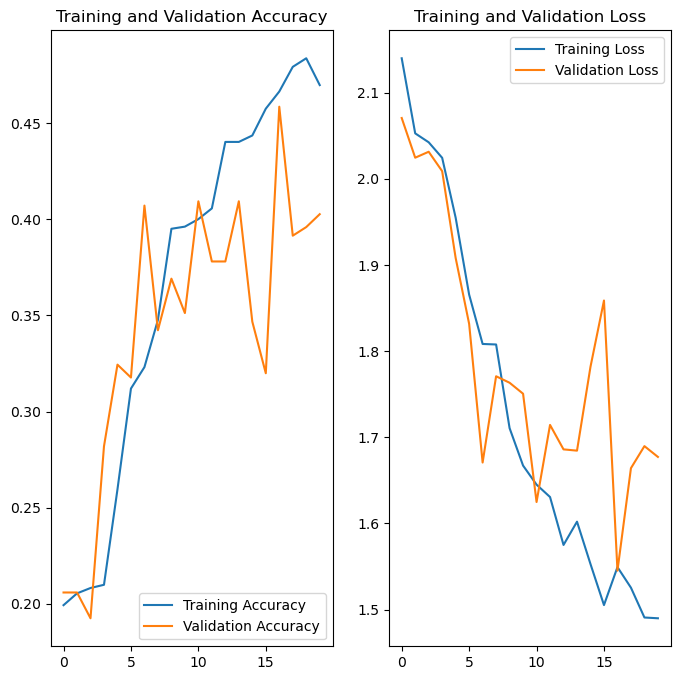

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 7.5  Observations <a name='no7.5' />

-  The model accuracy for **Train data set** has gone up to nearly **46%**.
-  The accuracy for the **Validation set** is also at **40%**.
-  This is a much better model compared to the previous two models as there seems to be **No Overfit** with the training accuracy **46%** and validation accuracy at **40%**.
-  `Data Augmentation` has improved the model performance.

## 8. Using Augmentor for Class Imbalance Treatment 

###  Installing Augmentor 

In [ ]:
!pip install Augmentor

### Using Augmentor 

In [29]:
path_to_training_dataset="D://Documents//UpgradeAIML//CNN_assignment//Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18981994D90>: 100%|█| 500/500 [00:04<00:00, 124.39 Samples


Initialised with 376 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1898CD2FF50>: 100%|█| 500/500 [00:04<00:00, 115.47 Samples


Initialised with 95 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1898CC9A0D0>: 100%|█| 500/500 [00:04<00:00, 109.04 Samples


Initialised with 438 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1898CD2A110>: 100%|█| 500/500 [00:19<00:00, 25.13 Sample


Initialised with 357 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x189AC66D210>: 100%|█| 500/500 [00:17<00:00, 28.50 Samples/


Initialised with 462 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18999FAB690>: 100%|█| 500/500 [00:04<00:00, 109.50 Samples


Initialised with 77 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1898CB1E950>: 100%|█| 500/500 [00:10<00:00, 49.49 Samples


Initialised with 181 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1898CD34150>: 100%|█| 500/500 [00:04<00:00, 115.58 Samples


Initialised with 139 image(s) found.
Output directory set to D://Documents//UpgradeAIML//CNN_assignment//Train//vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1898CA50E50>: 100%|█| 500/500 [00:04<00:00, 113.63 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [31]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 0 samples.
basal cell carcinoma has 0 samples.
dermatofibroma has 0 samples.
melanoma has 0 samples.
nevus has 0 samples.
pigmented benign keratosis has 0 samples.
seborrheic keratosis has 0 samples.
squamous cell carcinoma has 0 samples.
vascular lesion has 0 samples.


###  Observations 

-  The Augmentor has **helped decrease the imbalance** in class images and that can be viewed from above.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

##  10. Modelling Augmented Data 

In [35]:
batch_size = 32
img_height = 180
img_width = 180

### Creating the Train Data Set 

In [36]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


###  Creating the Validation Data Set 

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## 11. Model 3 

### Creating the Model 

In [38]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### Compiling the Model 

In [39]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the Model 

In [41]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 192s 1s/step - loss: 0.9799 - accuracy: 0.6332 - val_loss: 0.9733 - val_accuracy: 0.6711
Epoch 2/20
169/169 [==============================] - 198s 1s/step - loss: 0.9177 - accuracy: 0.6530 - val_loss: 1.1158 - val_accuracy: 0.6140
Epoch 3/20
169/169 [==============================] - 193s 1s/step - loss: 0.8174 - accuracy: 0.6964 - val_loss: 0.9899 - val_accuracy: 0.6563
Epoch 4/20
169/169 [==============================] - 193s 1s/step - loss: 0.7397 - accuracy: 0.7211 - val_loss: 0.9016 - val_accuracy: 0.7068
Epoch 5/20
169/169 [==============================] - 192s 1s/step - loss: 0.6821 - accuracy: 0.7392 - val_loss: 0.8462 - val_accuracy: 0.7275
Epoch 6/20
169/169 [==============================] - 193s 1s/step - loss: 0.6156 - accuracy: 0.7719 - val_loss: 0.9410 - val_accuracy: 0.6912
Epoch 7/20
169/169 [==============================] - 191s 1s/step - loss: 0.6254 - accuracy: 0.7617 - val_loss: 0.9720 - val_accuracy: 0.6823

###  Visualizing the model results 

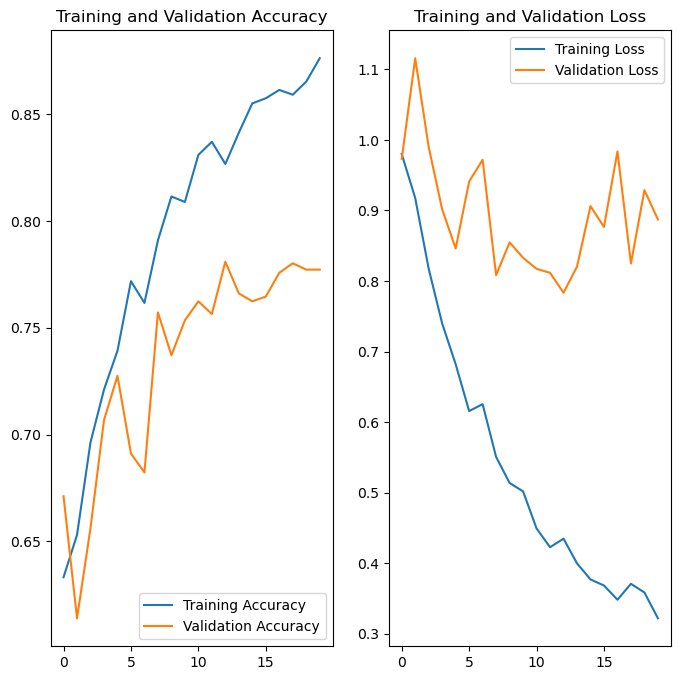

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations 

-  The training accuracy seems to be nearly **~87%**. 
-  The validation accuracy is nearly **~77%**.
-  Though the model accuracy has improved, the **class rebalance** has helped **treat the overfitting to some extent**.
-  Much better models could be built or tried out using **more epochs and more layers**.